In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


In [19]:
# Load the datasets
train_df = pd.read_csv('train.csv', encoding='latin1')
test_df = pd.read_csv('test.csv', encoding='latin1')


In [20]:
print("Training data:")
print(train_df.describe())
print("\nTest data:")
print(test_df.describe())

Training data:
       Population -2020  Land Area (Km²)  Density (P/Km²)
count      2.748100e+04     2.748100e+04     27481.000000
mean       4.018497e+07     6.621730e+05       357.686583
std        1.504946e+08     1.807425e+06      2013.750702
min        8.010000e+02     0.000000e+00         2.000000
25%        1.968001e+06     2.281000e+04        35.000000
50%        8.655535e+06     1.118900e+05        89.000000
75%        2.843594e+07     5.279700e+05       214.000000
max        1.439324e+09     1.637687e+07     26337.000000

Test data:
       Population -2020  Land Area (Km²)  Density (P/Km²)
count      3.534000e+03     3.534000e+03      3534.000000
mean       3.941891e+07     6.722499e+05       348.894171
std        1.468757e+08     1.839134e+06      1967.012367
min        8.010000e+02     0.000000e+00         2.000000
25%        1.968001e+06     2.281000e+04        35.000000
50%        8.696453e+06     1.127600e+05        87.000000
75%        2.843594e+07     5.279700e+05     

In [21]:
# Step 1: EDA
# Check for missing values
print("Missing values in training data:")
print(train_df.isnull().sum())
print("\nMissing values in test data:")
print(test_df.isnull().sum())

Missing values in training data:
textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

Missing values in test data:
textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64


C:\Users\asus\AppData\Local\Temp\ipykernel_18436\2802814717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='sentiment', palette='viridis')


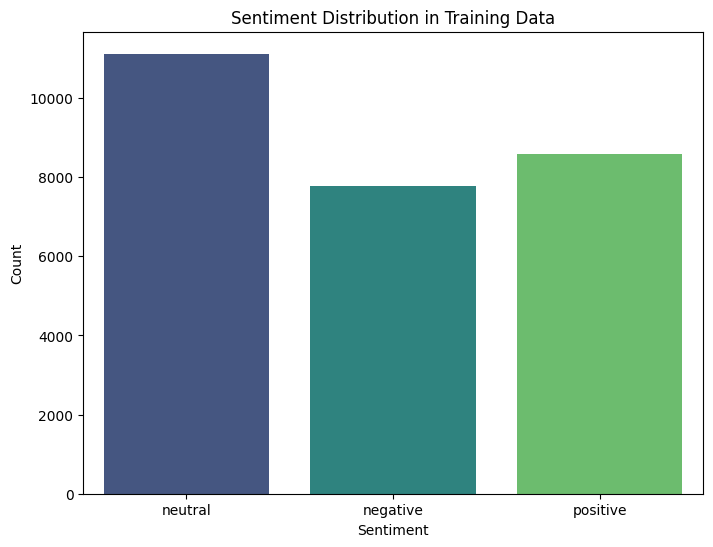

In [22]:
# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_18436\2657999140.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_df, x='sentiment', palette='viridis')


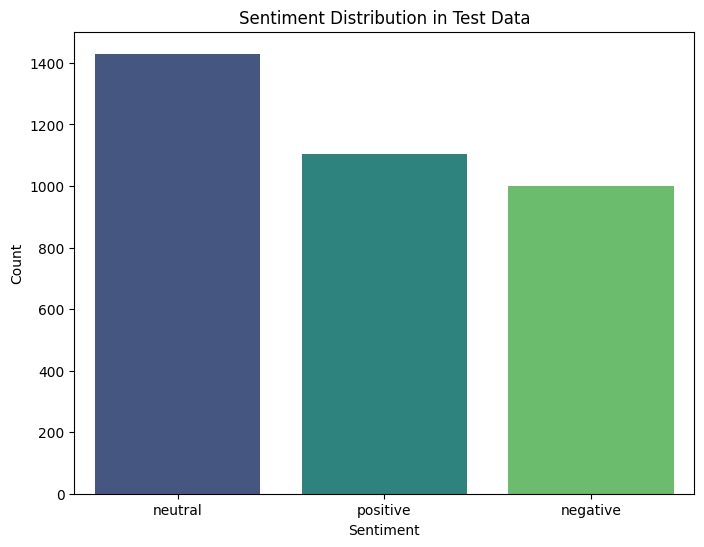

In [23]:
# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=test_df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution in Test Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [24]:
# Step 2: Data Preprocessing
# Handle missing values
train_df = train_df.dropna()
test_df = test_df.dropna()

In [25]:
# Encode categorical data (e.g., 'sentiment')
train_df['sentiment_encoded'] = train_df['sentiment'].map({'neutral': 0, 'positive': 1, 'negative': -1})
test_df['sentiment_encoded'] = test_df['sentiment'].map({'neutral': 0, 'positive': 1, 'negative': -1})


In [26]:
# Prepare features and labels
X_train = train_df['text']
y_train = train_df['sentiment_encoded']
X_test = test_df['text']
y_test = test_df['sentiment_encoded']

In [27]:
# Convert text data to numerical using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [28]:
# Step 3: Model Training
model = LogisticRegression()
model.fit(X_train_vec, y_train)

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# Step 3: Model Training
model = LogisticRegression()
model.fit(X_test_vec, y_test)

LogisticRegression()

In [30]:
# Step 4: Model Evaluation
y_train_pred = model.predict(X_train_vec)
y_test_pred = model.predict(X_test_vec)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.6349708879184862
Test Accuracy: 0.9595359366157329

Classification Report on Test Data:
              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1001
           0       0.94      0.97      0.96      1430
           1       0.97      0.95      0.96      1103

    accuracy                           0.96      3534
   macro avg       0.96      0.96      0.96      3534
weighted avg       0.96      0.96      0.96      3534



In [ ]:

vectorizer = CountVectorizer()

X_train_vec = vectorizer.fit_transform(train_df['text'].fillna(''))
X_test_vec = vectorizer.transform(test_df['text'].fillna(''))

y_train = train_df['sentiment_encoded']
y_test = test_df['sentiment_encoded']


model = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1],  # Use smaller values to regularize more
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
}


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Step 3: Fit GridSearchCV on training data
grid_search.fit(X_train_vec, y_train)

# Step 4: Evaluate the best model
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train_vec)
y_test_pred = best_model.predict(X_test_vec)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Training Accuracy: 0.875254730713246
Test Accuracy: 0.698641765704584

Classification Report (Test Data):
              precision    recall  f1-score   support

          -1       0.70      0.65      0.67      1001
           0       0.64      0.71      0.68      1430
           1       0.78      0.72      0.75      1103

    accuracy                           0.70      3534
   macro avg       0.71      0.70      0.70      3534
weighted avg       0.70      0.70      0.70      3534



C:\Users\asus\AppData\Local\Temp\ipykernel_18436\3264487996.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_counts.head(20), x="count", y="word", palette="viridis")


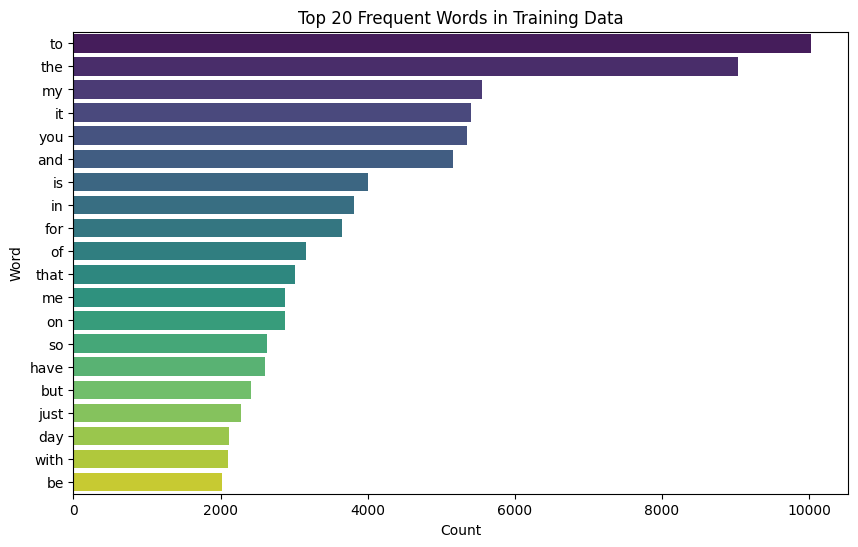

In [32]:
# Step 5: Visualization of Results
# Plot the most frequent words
word_counts = pd.DataFrame(
    vectorizer.get_feature_names_out(), columns=["word"]
).assign(count=X_train_vec.toarray().sum(axis=0)).sort_values(by="count", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=word_counts.head(20), x="count", y="word", palette="viridis")
plt.title("Top 20 Frequent Words in Training Data")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()
